<a href="https://colab.research.google.com/github/Josphat-Malombe/deep_learning/blob/main/model_006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [38]:
train_data=datasets.FashionMNIST(
    root="data",
    download=True,
    train=True,
    transform=ToTensor(),
    target_transform=None,

)

test_data=datasets.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=ToTensor(),
    target_transform=None,
)

In [39]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
train_dataloader=DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=32,shuffle=False)
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [41]:
flatten_model=nn.Flatten()
x=train_features_batch
output=flatten_model(x)
output.shape, x.shape

(torch.Size([32, 784]), torch.Size([32, 1, 28, 28]))

In [42]:
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape:int, hidden_unit:int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=output_shape),
        nn.ReLU()

    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)
model_006=FashionMNISTModel(input_shape=784,hidden_unit=30,output_shape=len(class_names))

In [43]:
def Accuracy(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [44]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_006.parameters(),lr=0.1)

In [45]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float):
  total_time=end-start
  return total_time

In [46]:

def train_loop(model,data_loader,criterion,optimizer,accuracy):
  train_loss,train_acc=0,0
  for batch,(X,y) in enumerate(data_loader):
    y_pred=model(X)
    loss=criterion(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

def test_loop(model,data_loader,criterion,accuracy):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(data_loader):
      test_pred=model(X)
      test_loss+=criterion(test_pred,y)
      test_acc+=accuracy(y_true=y,y_pred=test_pred.argmax(1))
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


In [47]:
from tqdm.auto import tqdm
train_time_start=timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch+1}-------------------\n")
  train_loop(model=model_006,data_loader=train_dataloader,criterion=criterion,optimizer=optimizer,accuracy=Accuracy)
  test_loop(model=model_006,data_loader=test_dataloader,criterion=criterion,accuracy=Accuracy)
train_time_end=timer()
print(f"Total Training Time: {print_train_time(start=train_time_start, end=train_time_end)}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:1-------------------

Train Loss: 0.59196 | Train Accuracy: 78.76%
Test Loss: 0.50981 | Test Accuracy: 80.95%
Epoch:2-------------------

Train Loss: 0.43175 | Train Accuracy: 84.44%
Test Loss: 0.43631 | Test Accuracy: 84.38%
Epoch:3-------------------

Train Loss: 0.39332 | Train Accuracy: 85.74%
Test Loss: 0.40871 | Test Accuracy: 85.19%
Total Training Time: 25.846728199000154


In [48]:
def evaluation_loop(model,data_loader,criterion,accuracy):
  model.eval()
  loss,acc=0,0
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=criterion(y_pred,y)
      acc+=Accuracy(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"Model_Name":model.__class__.__name__,
          "Model_Loss":loss.item(),
          "Model_Accuracy":acc
          }

In [49]:
evaluation_loop(model=model_006,data_loader=test_dataloader,criterion=criterion,accuracy=Accuracy)

{'Model_Name': 'FashionMNISTModel',
 'Model_Loss': 0.4087110757827759,
 'Model_Accuracy': 85.19369009584665}

In [50]:
class FashionmnistCNN(nn.Module):
  def __init__(self,input_shape:int,hidden_unit:int,output_shape:int):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_unit,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,out_channels=hidden_unit,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2,stride=2)
        )
    self.conv_block2=nn.Sequential(
      nn.Conv2d(hidden_unit,hidden_unit,3,padding=1),
      nn.ReLU(),
      nn.Conv2d(hidden_unit,hidden_unit,3,padding=1),
      nn.ReLU(),

      nn.MaxPool2d(2)
      )
    self.classifier=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_unit*7*7,out_features=output_shape),

     )
  def forward(self,x:torch.Tensor):
    x=self.conv_block1(x)
    x=self.conv_block2(x)
    x=self.classifier(x)
    return x

model_007=FashionmnistCNN(input_shape=1,hidden_unit=10,output_shape=len(class_names))


In [51]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_007.parameters(),lr=0.1)

In [52]:
start_time=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch+1}----------------\n")
  train_loop(model=model_007,data_loader=train_dataloader,criterion=criterion,optimizer=optimizer,accuracy=Accuracy)
  test_loop(model=model_007,data_loader=test_dataloader,criterion=criterion,accuracy=Accuracy)
end_time=timer()
print(f"Total Training Time: {print_train_time(start=start_time,end=end_time)}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:1----------------

Train Loss: 0.64321 | Train Accuracy: 76.50%
Test Loss: 0.39035 | Test Accuracy: 86.13%
Epoch:2----------------

Train Loss: 0.35736 | Train Accuracy: 87.07%
Test Loss: 0.35658 | Test Accuracy: 87.00%
Epoch:3----------------

Train Loss: 0.32175 | Train Accuracy: 88.44%
Test Loss: 0.34456 | Test Accuracy: 87.88%
Total Training Time: 101.94057345800002


In [53]:
evaluation_loop(model=model_007,data_loader=test_dataloader,criterion=criterion,accuracy=Accuracy)

{'Model_Name': 'FashionmnistCNN',
 'Model_Loss': 0.3445586562156677,
 'Model_Accuracy': 87.879392971246}

In [54]:
from os import pread
def make_predictions(model: torch.nn.Module, data: list, ):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)

In [55]:
import random
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)



In [56]:
pred_probs=make_predictions(model=model_007,data=test_samples)
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([3, 6, 6, 7, 5, 5, 6, 3, 6])

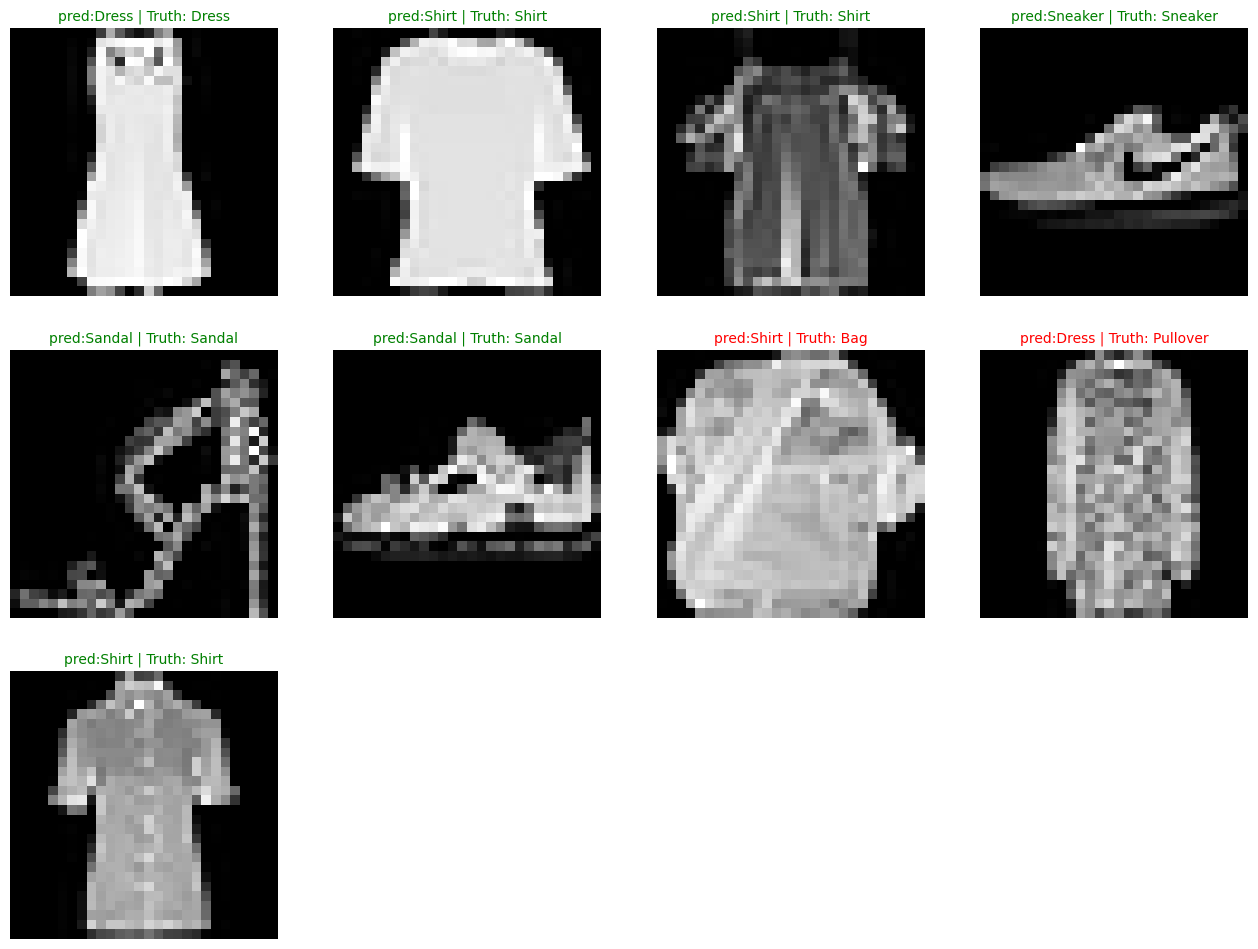

In [57]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,16))
rows=4
cols=4
for i, sample in enumerate(test_samples):
  plt.subplot(rows,cols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label=class_names[pred_classes[i]]
  truth_label=class_names[test_labels[i]]
  title_text= f"pred:{pred_label} | Truth: {truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10, c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)


Saving download.jpeg to download (4).jpeg
processing download (4).jpeg....
Min: <built-in method min of Tensor object at 0x79c7f60fd490>, Max: <built-in method max of Tensor object at 0x79c7f60fd490>


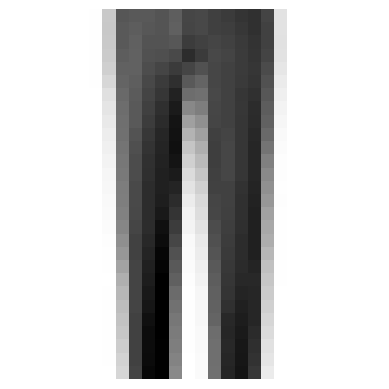

the piece of clothe is a : Trouser


In [61]:
from PIL import Image
import torchvision.transforms as transforms

def preprocess(image_path):
  img=Image.open(image_path).convert('L')
  transform=transforms.Compose([
      transforms.Resize((28,28)),
      transforms.ToTensor(),
      transforms.Normalize((0.5,),(0.5,))

  ])

  img_tensor=transform(img)
  print(f"Min: {img_tensor.min}, Max: {img_tensor.max}")
  img_tensor=img_tensor.unsqueeze(0)
  return img_tensor
def predict(model,image_tensor,class_names):
  model.eval()
  with torch.inference_mode():
    output=model(image_tensor)
    prediction=output.argmax(dim=1).item()
  return class_names[prediction]

from google.colab import files
uploaded=files.upload()

for filename in uploaded.keys():
  print(f"processing {filename}....")
  image_tensor=preprocess(filename)

  plt.imshow(image_tensor.squeeze(),cmap="gray")
  plt.axis(False)
  plt.show()

  predicted_class=predict(model_007,image_tensor,class_names)
  print(f"the piece of clothe is a : {predicted_class}")